<a href="https://colab.research.google.com/github/ProjectFaceOff/Face_Off/blob/master/SVMPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/'

Mounted at /content/gdrive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving pastaOnTheBeach.PNG to pastaOnTheBeach.PNG


In [0]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
I = imread('pastaOnTheBeach.PNG')

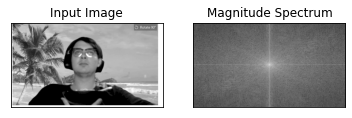

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('pastaOnTheBeach.PNG',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


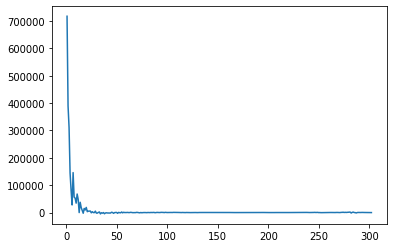

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# get some image
image = f
image = image[:,0:303]

# create array of radii
x,y = np.meshgrid(np.arange(image.shape[1]),np.arange(image.shape[0]))
R = np.sqrt(x**2+y**2)

# calculate the mean
f = lambda r : image[(R >= r-.5) & (R < r+.5)].mean()
r  = np.linspace(1,302,num=302)
mean = np.vectorize(f)(r)

# plot it
fig,ax=plt.subplots()
ax.plot(r,mean)
plt.show()

In [0]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
x = PCA(n_components=50).fit_transform(magnitude_spectrum.tolist())
tsne = TSNE(perplexity=4.0, n_iter=4000).fit_transform(x)
#tsne.fit_transform(r)
#tsne = tsne.fit_transform(r[:10000])  

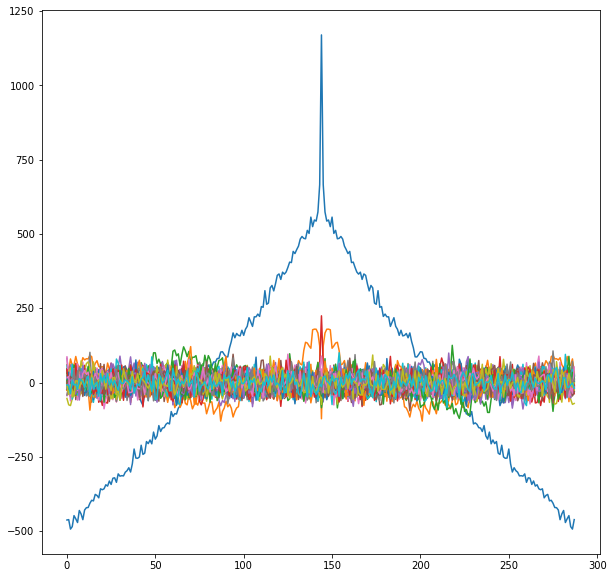

In [87]:
plt.plot(x)

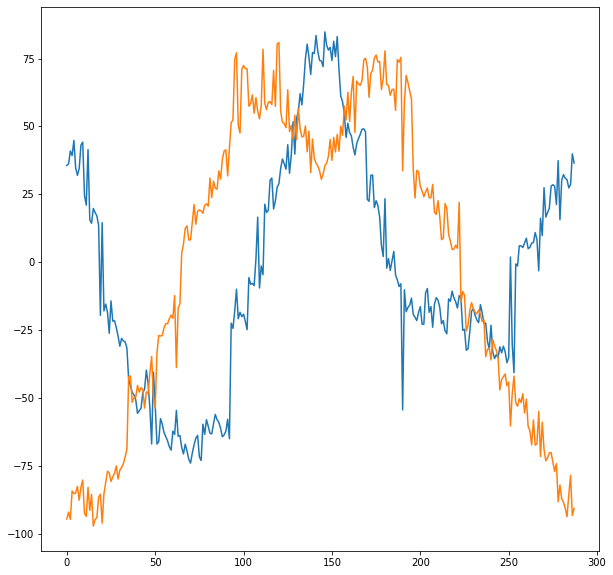

In [88]:
plt.plot(tsne)

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=1E10)
#model.fit(X, y)